In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision

from torch.utils.tensorboard import SummaryWriter

import sklearn
import functools
import operator

import sys

sys.path.insert(1,"/home/sbulusu/qcd_ml/neural_networks/libs/")

import lat_dataset_load_new
import aenc_torch_net_class
import torch_net_class
import utils

from tqdm.notebook import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Utilizing CUDA")
else:
    device = torch.device("cpu")
    print("Utilizing CPU")

Utilizing CUDA


In [3]:
"""
Load Data
"""
#conf_file_dir = "/media/data/sbulusu/datasets/kl_config/"
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/"
#file_format = "*.dat"
#file_format_list = ["*1.170*.dat", "*0.910*.dat"]
file_format_list = ["configs*.dat"]
lat_size = [10,200]
dim = len(lat_size)
conf_size = np.concatenate(([2],[dim],lat_size))
print(conf_size)
output_size = np.concatenate(([np.prod(conf_size[0:2])],conf_size[2:]))
print(output_size)

label_names = ["n", "phi2"]
labels_in_file_name = ["mu", "phase"]

dataset = lat_dataset_load_new.kl_dataset(conf_file_dir, file_format_list, conf_size, output_size, label_names, labels_in_file_name, transform="default", device=device)

[  2   2  10 200]
[  4  10 200]
[ -1   2   2  10 200]


Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.945.dat with size :torch.Size([5000, 2, 2, 10, 200])


first example loaded:
{'conf': tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 1,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [1, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 1],
          [0, 0, 0,  ..., 0, 0, 1]],

         [[0, 0, 1,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [1, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 1]]]]), 'mu': tensor(0.9450, device='cuda


Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.970.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.975.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.950.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.915.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.995.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.010.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.935.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.930.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.015.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.045.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.035.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.965.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.005.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.985.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.955.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.030.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.940.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.960.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.025.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.040.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.980.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.910.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.990.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.920.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.050.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.020.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.000.dat with size :torch.Size([5000, 2, 2, 10, 200])




last example loaded:
{'conf': tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  1,  1,  1],
          ...,
          [ 0,  1,  1,  ...,  0,  0,  0],
          [ 1,  0,  0,  ...,  1,  1,  1],
          [ 1,  1,  1,  ...,  0,  0,  0]],

         [[-1,  0,  0,  ...,  0,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0, -1,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ..., -1,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0]]],


        [[[ 0,  0,  0,  ...,  0,  0,  1],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,

In [4]:
#target_attributes = ["mu"]
#output_attributes = ["mu"]
target_attributes = ["n"]
output_attributes = ["n"]
#target_attributes = ["phase"]
#output_attributes = ["order","disorder"]
#output_attributes = ["phase_p"]

#dataset.train_label_names = ["phase"]
dataset.train_label_names = ["n"]

In [5]:
sample_conf, sample_label = dataset.get_conf(0)
print(sample_conf.shape)

torch.Size([2, 2, 10, 200])


tensor([0.], dtype=torch.float64)


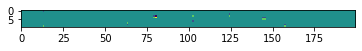

In [6]:
k_lat_links = sample_conf[0]
l_lat_links = sample_conf[1]
plt.imshow(k_lat_links[0])
print(sample_label)

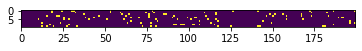

In [7]:
plt.imshow(l_lat_links[0])

In [8]:
"""
HYPERPARAMETERS
"""

random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed)

#val_epochs = [5,10,20,30]
val_epochs = [1,2,3,4,5]
#val_epochs = list(range(0,20))
#save_state_epochs = [10000]
save_state_epochs = [1,2,3,4,5]

"""Manually set network structure"""
"""
    This list can be loaded into the constructor of the Net neural network class, to automatically generate the network structure
    type = pointer to the layer function'
    layer_pars = parameters which must be given to the layer function in order to initialize it
    act_func = activation function to be applied directly after feeding to the corresponding layer
    dropout = certain neurons cna be dropped out if specified
"""

fixed_net_struct = []
input_size = dataset.get_input_size()
print(f"input size {input_size}")
target_size = len(target_attributes)
print(f"target size {target_size}")
#output_size = target_size
output_size = len(output_attributes)
output_size = output_size


#[ [[in_channels, out_channels], [kernel_size], [stride], padding], ... ]
#kernel_pars = [ [[input_size[0],4],[12,3],1,0], [[4,8],[12,3],1,0], [[8,16],[12,3],1,0], [[16,16],[12,3],1,0], [[16,16],[8,2],1,0] ]
kernel_pars = [ [[input_size[0],16],[3,9],[1,1],0], [[16,16],[1,4],[1,4],0], [[16,32],[3,13],[1,1],0], [[32,32],[1,4],[1,4],0], [[32,64],[3,4],[1,1],0]]
act_func = torch.prelu
#, "act_func": act_func
for i, kernel_par in enumerate(kernel_pars):
    if i%2 == 0:
        layer_type = nn.Conv2d
        fixed_net_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
        fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
    else:
        layer_type = nn.MaxPool2d
        #layer_type = nn.AvgPool2d
        fixed_net_struct.append( {"type": layer_type, "layer_pars": {"kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3]}} )
        

conv_sizes = utils.calc_layer_sizes(input_size, fixed_net_struct)
print(conv_sizes)
fc_input_size = np.product(conv_sizes[-1])


#fixed_net_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
#fixed_net_struct.append( {"type": utils.Reshape, "layer_pars": {"new_shape": [-1,fc_input_size]}} )
fixed_net_struct.append( {"type": utils.Reshape, "layer_pars": {"new_shape": [fc_input_size]}} )
fixed_net_struct.append( {"type": nn.Dropout, "layer_pars": {"p": 0.2 }} )
#fixed_net_struct.append( {"type": nn.BatchNorm1d, "layer_pars": {"num_features": fc_input_size}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features": fc_input_size//2}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": fc_input_size//4}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//4, "out_features": output_size}, "act_func": torch.sigmoid} )
#fixed_net_struct.append( {"type": nn.Softmax, "layer_pars": {"dim": 1}} )
#dim 0 or 1???
#fixed_net_struct.append( {"type": nn.ConvTranspose2d, "layer_pars": {"in_channels": 1, "out_channels": 1, "kernel_size": [1,1], "stride": 1, "padding": 1, "bias": True}, "act_func": act_func} )



"""
act_func = torch.prelu

fixed_net_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": int(np.prod(input_size)), "out_features": 2000}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 2000, "out_features": 2000}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 2000, "out_features": 1000}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 1000, "out_features": output_size}} )

"""
layer_sizes = utils.calc_layer_sizes(input_size, fixed_net_struct)
print(layer_sizes)

"""create list of parameters manually"""

hyper_parameters = {}
#hyper_parameters["loss_func"] = nn.CrossEntropyLoss
#hyper_parameters["loss_func"] = nn.BCELoss
hyper_parameters["loss_func"] = nn.MSELoss
hyper_parameters["optimizer"] = optim.Adam
hyper_parameters["batch_size"] = 10 
hyper_parameters["lr"] = 0.00001
hyper_parameters["net_struct"] = fixed_net_struct

hyper_parameters["val_method"] = "holdout"
hyper_parameters["val_method_pars"] = {"train" : 0.7, "val" : 0.1, "test" : 0.2}
#hyper_parameters["val_method"] = "k_fold"
#hyper_parameters["val_method_pars"] = 5

input size [  4  10 200]
target size 1
0
<class 'torch.nn.modules.conv.Conv2d'>
[3, 9]
last layer [  4  10 200]
new layer [8]
last layer [  4  10 200]
new layer [8, 192]
1
<class 'torch.nn.modules.activation.PReLU'>
custom layer operation not defined, assuming previous layer_size
2
<class 'torch.nn.modules.pooling.MaxPool2d'>
[1, 4]
last layer [16, 8, 192]
new layer [8]
last layer [16, 8, 192]
new layer [8, 48]
3
<class 'torch.nn.modules.conv.Conv2d'>
[3, 13]
last layer [16, 8, 48]
new layer [6]
last layer [16, 8, 48]
new layer [6, 36]
4
<class 'torch.nn.modules.activation.PReLU'>
custom layer operation not defined, assuming previous layer_size
5
<class 'torch.nn.modules.pooling.MaxPool2d'>
[1, 4]
last layer [32, 6, 36]
new layer [6]
last layer [32, 6, 36]
new layer [6, 9]
6
<class 'torch.nn.modules.conv.Conv2d'>
[3, 4]
last layer [32, 6, 9]
new layer [4]
last layer [32, 6, 9]
new layer [4, 6]
7
<class 'torch.nn.modules.activation.PReLU'>
custom layer operation not defined, assuming pr

In [9]:
epochs = max(val_epochs)+1

lr=hyper_parameters["lr"]
batch_size = hyper_parameters["batch_size"]
loss_func = hyper_parameters["loss_func"]()
net_struct = hyper_parameters["net_struct"]
val_method = hyper_parameters["val_method"]
val_method_pars = hyper_parameters["val_method_pars"]
optimizer_type = hyper_parameters["optimizer"]

val_pred_paths = []
val_label_paths = []

train_loss = np.zeros(epochs)
val_loss = np.zeros(len(val_epochs))

net_state_paths = []

#create training log
log_file_name = "log.txt"
log_file = open(log_file_name, "w")

In [10]:
#tb = SummaryWriter()

net = torch_net_class.Net(net_struct, input_size=dataset.get_input_size(), output_size=[output_size])    
net.init_weights(torch.nn.init.xavier_normal_)
net.set_batch_size(batch_size)
#net.set_layer_sizes(layer_sizes)
net.to(device)
#net.show_layers()
net_parameters = net.parameters()

optimizer = optimizer_type(net_parameters, lr=lr)

Adding {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 4, 'out_channels': 16, 'kernel_size': [3, 9], 'stride': [1, 1], 'padding': 0, 'bias': True}}

Adding {'type': <class 'torch.nn.modules.activation.PReLU'>, 'layer_pars': {}}

Adding {'type': <class 'torch.nn.modules.pooling.MaxPool2d'>, 'layer_pars': {'kernel_size': [1, 4], 'stride': [1, 4], 'padding': 0}}

Adding {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 16, 'out_channels': 32, 'kernel_size': [3, 13], 'stride': [1, 1], 'padding': 0, 'bias': True}}

Adding {'type': <class 'torch.nn.modules.activation.PReLU'>, 'layer_pars': {}}

Adding {'type': <class 'torch.nn.modules.pooling.MaxPool2d'>, 'layer_pars': {'kernel_size': [1, 4], 'stride': [1, 4], 'padding': 0}}

Adding {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 32, 'out_channels': 64, 'kernel_size': [3, 4], 'stride': [1, 1], 'padding': 0, 'bias': True}}

Adding {'type': <class 'torch

In [11]:
net

Net(
  (layers): ModuleList(
    (0): Conv2d(4, 16, kernel_size=[3, 9], stride=[1, 1])
    (1): PReLU(num_parameters=1)
    (2): MaxPool2d(kernel_size=[1, 4], stride=[1, 4], padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=[3, 13], stride=[1, 1])
    (4): PReLU(num_parameters=1)
    (5): MaxPool2d(kernel_size=[1, 4], stride=[1, 4], padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=[3, 4], stride=[1, 1])
    (7): PReLU(num_parameters=1)
    (8): Reshape()
    (9): Dropout(p=0.2, inplace=False)
    (10): Linear(in_features=1536, out_features=768, bias=True)
    (11): PReLU(num_parameters=1)
    (12): Linear(in_features=768, out_features=384, bias=True)
    (13): PReLU(num_parameters=1)
    (14): Linear(in_features=384, out_features=1, bias=True)
  )
)

In [12]:
"""Take specific example indices with particular labels"""

filter_label_names = ["mu"]
label_values = [[0.910, 0.915, 1.000, 1.050]]

filtered_train_indices = dataset.filter_indices_label_vals(filter_label_names, label_values, remove=False)

Filtering indices with respect to labels ['mu'], remove = False


In [13]:
remaining_indices = [ i for i in tqdm(range(0,len(dataset))) if i not in filtered_train_indices]

In [14]:
val_test_ratio = [0.2,0.8]
val_indices, test_indices = utils.split_shuffle_indices(remaining_indices, fractions=val_test_ratio, shuffle=True, random_seed=42, log_file=None)
train_indices = filtered_train_indices

splitting into fraction [0.2, 0.8]
number of indices: 125000
slicing from 0 to 25000
slicing from 25000 to 125000


In [15]:
#for f in filtered_train_indices[-20:]:
#   print(dataset.data[f]["mu"])

In [16]:
#for v in val_indices[-20:]:
#    print(dataset.data[v]["mu"])

In [17]:
#for t in test_indices[-20:]:
#    print(dataset.data[t]["mu"])

In [18]:
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)


train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

In [19]:
"""regular training with all data"""

split_indices = utils.load_split_indices(dataset=dataset, batch_size=batch_size, method=val_method, method_pars=val_method_pars, shuffle=True, random_seed=random_seed, log_file=log_file)

train_indices = split_indices[0][0]
val_indices = split_indices[0][1]
test_indices = split_indices[0][2]

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)


size of test set :36251

size of val set :15536

size of train set :93213



In [20]:


val_dir = "val/"
try:
    os.makedirs(val_dir)
except FileExistsError:
    pass
train_state_dir = "net_states/"
try:
    os.makedirs(train_state_dir)
except FileExistsError:
    pass

epoch = 0
val_i = 0
for epoch in tqdm(range(epochs)):
    
    batch_nr = 0
    epoch_loss = np.zeros(len(train_loader))
    
    """Actual training step"""
    for train_mini_batch in tqdm(train_loader):
        batch_loss, train_output = utils.step(net, train_mini_batch[0], train_mini_batch[1], loss_func, optimizer, device, mode="train", log_file=log_file)
        epoch_loss[batch_nr] = batch_loss.item()
        batch_nr += 1
    mean_epoch_loss = epoch_loss.mean()
    train_loss[epoch] = mean_epoch_loss
    print(f"mean epoch {epoch} train loss: {mean_epoch_loss}\n")
    
    
    """save the neural networks state"""
    if epoch in save_state_epochs:
        train_state_epoch_file_path = train_state_dir + f"state_epoch_{epoch}"
        #train_state = {"epoch" : epoch, "state_dict": net.state_dict(), "optimizer": optimizer.state_dict()}
        #torch.save(train_state, train_state_epoch_file_path)
        torch.save(net.state_dict(), train_state_epoch_file_path)
        net_state_paths.append(train_state_epoch_file_path)
        print(f"saved model from epoch {epoch}")
        
    """
    Validation
    """
    if epoch in val_epochs:
        val_label = []
        val_pred = []
        
        val_batch_nr = 0
        val_epoch_loss = np.zeros(len(val_loader))
        
        for val_mini_batch in tqdm(val_loader):
            label_batch = val_mini_batch[1]
            val_label.append(label_batch.detach().cpu().numpy())
            val_batch_loss, val_output = utils.step(net, val_mini_batch[0], val_mini_batch[1], loss_func, optimizer, device, mode="val", log_file=log_file)
            val_epoch_loss[val_batch_nr] = val_batch_loss.item()
            
            val_pred.append(val_output.detach().cpu().numpy())
            
            """
            class_batch_pred = []
            #print(val_output)
            for val in val_output:
                class_index = val.argmax().detach().cpu()
                class_batch_pred.append(class_index)
            #print(class_batch_pred)
            val_pred.append(class_batch_pred)
            """
            val_batch_nr += 1
            
        mean_val_epoch_loss = val_epoch_loss.mean()
        val_loss[val_i] = mean_val_epoch_loss
        print(f"mean epoch {epoch} val loss: {mean_val_epoch_loss}\n")
        
        val_i += 1
        
        val_pred_path = val_dir + "/" + f"val_epoch_{epoch}_pred"
        val_label_path = val_dir + "/" + f"val_epoch_{epoch}_labels"
        #print(np.array(functools.reduce(operator.iconcat, val_pred, [])))
        np.array(functools.reduce(operator.iconcat, val_pred, [])).tofile(val_pred_path, sep=" ")
        np.array(functools.reduce(operator.iconcat, val_label, [])).tofile(val_label_path, sep=" ")
        #np.array(val_pred).tofile(val_pred_path)
        #np.array(val_label).tofile(val_pred_label)
        
        val_pred_paths.append(val_pred_path)
        val_label_paths.append(val_label_path)
        
log_file.close()

SyntaxError: invalid syntax (<ipython-input-20-b80e7b8fa19f>, line 1)

In [ ]:
"""train_state_file_path = train_state_dir + f"state_epoch_{epoch}"
#train_state = {"epoch" : epoch, "state_dict": net.state_dict(), "optimizer": optimizer.state_dict()}
torch.save(net.state_dict(), train_state_file_path)
net_state_paths.append(train_state_epoch_file_path)
print(f"saved model from epoch {epoch}")"""

In [ ]:
i = 2
net_state_path = net_state_paths[i]
print(net_state_path)

In [ ]:
#net_state_path = "net_states/state_epoch_30"
net.load_state_dict(torch.load(net_state_path))
#net.eval()

In [ ]:
"""Plot training loss curve and save as image"""
loss_img_file_name = "train_loss.png"
x_epochs = range(epochs)
fig, ax = plt.subplots()
ax.plot(x_epochs, train_loss, label="train loss")
ax.plot(val_epochs, val_loss, label="val loss")
leg = ax.legend()
#plt.title()
plt.xlabel("epoch")
#plt.ylabel("loss")
plt.savefig(loss_img_file_name)
plt.show()
plt.close()
train_loss_txt_file_name = "train_loss.txt"
np.savetxt(train_loss_txt_file_name, train_loss)
val_loss_txt_file_name = "val_loss.txt"
np.savetxt(val_loss_txt_file_name, val_loss)

In [ ]:
val_labels = np.fromfile(val_label_paths[-1], sep=" ")
val_pred = np.fromfile(val_pred_paths[-1], sep=" ")

In [ ]:
val_labels

In [ ]:
val_pred

In [ ]:
"""Print MSE"""
print(np.array(val_labels).shape)
print(np.array(val_pred).shape)
val_df = pd.DataFrame(np.array([val_labels,val_pred]).T)
val_df.columns = ["label", "pred"]
val_df["dev"] = abs(val_df["label"] - val_df["pred"]) 
#val_df["mse"] = (val_df["label"] - val_df["pred"])**2
val_df.head(20)

In [ ]:
val_df.describe()

In [ ]:
"""
Load Test Data
"""
net.eval()
print(f"test dataset size: {len(test_indices)}")

input_size = net.get_input_size()
output_size = net.get_output_size()
model_input_shape = tuple(np.concatenate(([-1],input_size)))
print(model_input_shape)

net_outputs = np.zeros( (len(test_indices)) )
labels = np.zeros( (len(test_indices)) )
mus = np.zeros( (len(test_indices)) )

for i in tqdm(range(len(test_indices))):
    
    test_index = test_indices[i]
    conf_lat_links, label = dataset.get_conf(test_index)
    mus[i] = dataset.data[test_index]["mu"].detach().cpu().numpy()
    net_outputs[i] = net(conf_lat_links.view(model_input_shape).to(device).float()).detach().cpu().numpy()
    #output = net(conf_lat_links.view(model_input_shape).float())
    labels[i] = label.detach().cpu().numpy()

In [ ]:
plt.scatter(mus, net_outputs)

In [ ]:
plt.scatter(mus, labels)

In [ ]:
x_max = np.max(labels)
x_min = np.min(labels)

plt.scatter(labels, net_outputs, c="r", label="predicted")
plt.plot([x_min, x_max], [x_min, x_max], c="g")
plt.xlabel("n label")
plt.ylabel("n predicted")
#plt.show()
plt.savefig("n_label_pred")